In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("incident.csv")

In [3]:
df.head()

,Unnamed: 0,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contacttype,knowledge,upriorityconfirmation,caller_id,...,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
0,4,7,1,0,0,0,3,1,0,2403,...,29,2,2016,4,40,29,2,2016,4,57
1,5,1,1,1,0,1,3,1,0,2403,...,29,2,2016,4,40,29,2,2016,4,57
2,6,1,1,1,0,2,3,1,0,2403,...,29,2,2016,4,40,29,2,2016,4,57
3,7,1,1,1,0,3,3,1,0,2403,...,29,2,2016,4,40,29,2,2016,4,57
4,8,1,1,1,0,4,3,1,0,2403,...,29,2,2016,4,40,29,2,2016,4,57


spliting of data into x and y variable 

In [17]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [18]:
df.head()

,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contacttype,knowledge,upriorityconfirmation,caller_id,open_by,...,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
0,7,1,0,0,0,3,1,0,2403,397,...,29,2,2016,4,40,29,2,2016,4,57
1,1,1,1,0,1,3,1,0,2403,397,...,29,2,2016,4,40,29,2,2016,4,57
2,1,1,1,0,2,3,1,0,2403,397,...,29,2,2016,4,40,29,2,2016,4,57
3,1,1,1,0,3,3,1,0,2403,397,...,29,2,2016,4,40,29,2,2016,4,57
4,1,1,1,0,4,3,1,0,2403,397,...,29,2,2016,4,40,29,2,2016,4,57


In [19]:
X=df.drop("i_impact",axis=1)

In [20]:
X.head()

,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contacttype,knowledge,upriorityconfirmation,caller_id,open_by,...,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
0,7,1,0,0,0,3,1,0,2403,397,...,29,2,2016,4,40,29,2,2016,4,57
1,1,1,1,0,1,3,1,0,2403,397,...,29,2,2016,4,40,29,2,2016,4,57
2,1,1,1,0,2,3,1,0,2403,397,...,29,2,2016,4,40,29,2,2016,4,57
3,1,1,1,0,3,3,1,0,2403,397,...,29,2,2016,4,40,29,2,2016,4,57
4,1,1,1,0,4,3,1,0,2403,397,...,29,2,2016,4,40,29,2,2016,4,57


In [21]:
Y = df['i_impact']

In [22]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: i_impact, dtype: int64

# Train and Test split 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

# Balancing of the data 
using smote to balance tha data 

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE()

In [27]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [28]:
from collections import Counter
print("Before SMOTE :",Counter(y_train))
print("After SMOTE :",Counter(y_train_smote))

Before SMOTE : Counter({2: 94155, 3: 2647, 1: 2393})
After SMOTE : Counter({2: 94155, 1: 94155, 3: 94155})


# Feature selection 

 #### Feature Importance using Extra Trees Classifier

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_smote,y_train_smote)

ExtraTreesClassifier()

In [30]:
model.feature_importances_

array([0.0344628 , 0.01687982, 0.02274045, 0.0029767 , 0.02237602,
       0.00131027, 0.04309893, 0.04461472, 0.04041696, 0.09499272,
       0.04921895, 0.02800658, 0.0346275 , 0.0345894 , 0.0289728 ,
       0.04246739, 0.03837528, 0.0478208 , 0.03852068, 0.02150441,
       0.01980094, 0.00169532, 0.02247739, 0.01571059, 0.02583002,
       0.02945007, 0.00141418, 0.0457855 , 0.02588267, 0.02617038,
       0.02835268, 0.00132749, 0.04138627, 0.02674335])

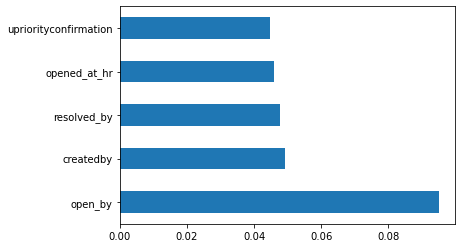

In [31]:
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(5).plot(kind='barh')
plt.show()

 #### Feature Selection using Mutual information

In [32]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train_smote, y_train_smote)
mutual_info

array([0.22903363, 0.07009168, 0.18730669, 0.00436094, 0.46386072,
       0.02773011, 0.07077595, 0.11210334, 0.59892904, 0.5570587 ,
       0.32266869, 0.37102229, 0.22386721, 0.28872167, 0.22689492,
       0.41238205, 0.28158227, 0.41743398, 0.33954367, 0.27684345,
       0.22995999, 0.01850664, 0.37867481, 0.45309395, 0.20434425,
       0.16358934, 0.01795575, 0.24731386, 0.24178538, 0.20232254,
       0.16011613, 0.01719735, 0.23986459, 0.23166856])

In [33]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


caller_id                0.598929
open_by                  0.557059
sysmodcount              0.463861
updated_minute           0.453094
resolved_by              0.417434
assigned_to              0.412382
updated_hr               0.378675
updatedby                0.371022
assignment_group         0.339544
createdby                0.322669
subbcategory             0.288722
categoryy                0.281582
updated_day              0.276843
opened_at_hr             0.247314
opened_at_minute         0.241785
created_at_hr            0.239865
created_at_minute        0.231669
updated_month            0.229960
incidentstate            0.229034
symptom                  0.226895
loc                      0.223867
opened_at_day            0.204344
created_at_day           0.202323
reassignmentcount        0.187307
opened_at_month          0.163589
created_at_month         0.160116
upriorityconfirmation    0.112103
knowledge                0.070776
active                   0.070092
contacttype   

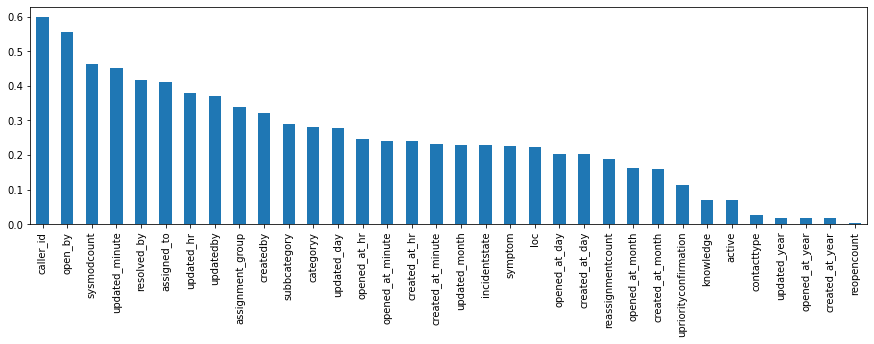

In [34]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 4))


In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train_smote, y_train_smote)
X_train.columns[sel_five_cols.get_support()]


Index(['sysmodcount', 'caller_id', 'open_by', 'createdby', 'updatedby',
       'assigned_to', 'resolved_by', 'assignment_group', 'updated_hr',
       'updated_minute'],
      dtype='object')

### Feature Importance using Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [38]:
feature = pd.Series(model.feature_importances_)
feature.index = X_train.columns
feature.sort_values(ascending=False)


open_by                  0.242338
assignment_group         0.089101
sysmodcount              0.079730
opened_at_hr             0.054005
caller_id                0.053689
reassignmentcount        0.039402
createdby                0.037564
knowledge                0.036178
created_at_hr            0.032845
subbcategory             0.030735
upriorityconfirmation    0.029824
resolved_by              0.029232
categoryy                0.024447
incidentstate            0.022956
loc                      0.022899
opened_at_minute         0.019180
symptom                  0.018262
assigned_to              0.016747
opened_at_month          0.015202
created_at_day           0.014683
updatedby                0.013975
created_at_month         0.013244
created_at_minute        0.011964
opened_at_day            0.011285
updated_day              0.008284
updated_hr               0.007541
updated_month            0.007269
active                   0.006038
updated_minute           0.004260
reopencount   

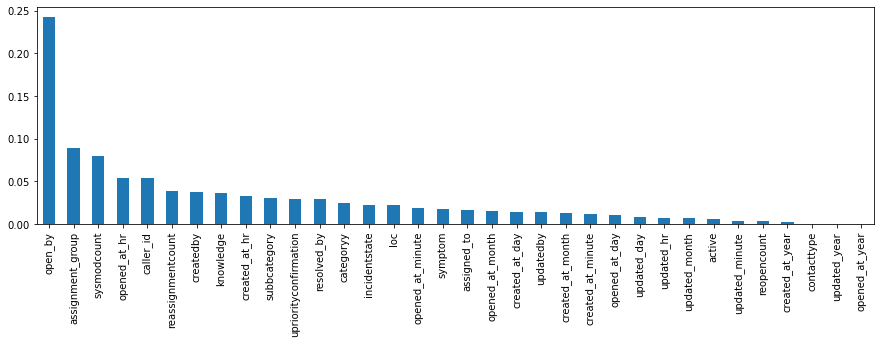

In [39]:
feature.sort_values(ascending=False).plot.bar(figsize=(15, 4))


### Feature Selection using Chi Square 

In [40]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=16)
ordered_feature=ordered_rank_feature.fit(X_train_smote,y_train_smote)
ordered_feature

SelectKBest(k=16, score_func=<function chi2 at 0x0000026931C0BA60>)

In [43]:
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['scores'])
df_columns=pd.DataFrame(X_train.columns)
features_rank=pd.concat([df_scores,df_columns],axis=1)
features_rank.nlargest(10,'scores')

#These are top 10 features useful for predicting impact

,scores,0
8,1.595930e+06,caller_id
9,8.731750e+05,open_by
11,3.492463e+05,updatedby
10,2.530590e+05,createdby
15,7.835950e+04,assigned_to
17,6.064706e+04,resolved_by
12,4.963523e+04,loc
4,2.616341e+04,sysmodcount
13,2.569817e+04,subbcategory
24,2.258494e+04,opened_at_day


### These are the top ten features for  the prediction of the impact 

let us choose any 5-6 features from above 